In [1]:
import sys
sys.path.append('..')
import pymbd
from pymbd import mbd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bohr = mbd.bohr

0.5362854564217415

## Argon dimer

In [3]:
mbd.param_dipole_matrix_accuracy = 1e-10

In [4]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (4., 0., 0.)]/bohr

In [6]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [7]:
mbd.get_single_mbd_energy('', 'fermi,dip', xyz, alpha_0, omega, r_vdw=R_vdw, beta=1., a=6.)[0]

-0.0001223737042788109

In [8]:
mbd.get_qho_rpa_energy('', 'fermi,dip', xyz, mbd.alpha_dynamic_ts_all('C', mbd.n_grid_omega, alpha_0, c6=C6),
                       r_vdw=R_vdw, beta=1., a=6.)[0]

-0.00012290836996899313

In [9]:
mbd.get_ts_energy('', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6.)

-0.00012234680209302474

## Linear argon chain

In [10]:
mbd.param_dipole_matrix_accuracy = 1e-10

In [11]:
species = ['Ar']
xyz = [(0., 0., 0.)]/bohr
uc = np.array([(4., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [13]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [14]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [15]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

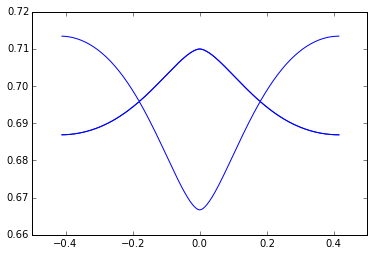

In [16]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [17]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [18]:
cutoffs = [8., 12., 25., 50., 100., 200., 400., 800.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

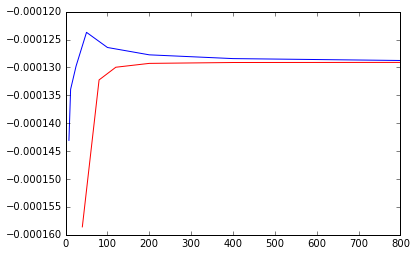

In [19]:
plt.plot(cutoffs, enes_supercell, 'b',
         [10*x for x in ns_kpt], enes_periodic, 'r')

In [20]:
mbd.get_ts_energy('P', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.00012831280394436066

In [21]:
(enes_supercell[-1], enes_periodic[-1])

(-0.00012876096463059527, -0.00012910460961087778)

In [22]:
mbd.param_mbd_supercell_cutoff = 30./bohr

In [23]:
mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                             r_vdw=R_vdw, beta=1., a=6.)[0]

-0.0001213294099366468

In [24]:
mbd.get_supercell_mbd_energy('PQ', 'fermi,dip', xyz, alpha_0, omega, uc,
                             r_vdw=R_vdw, beta=1., a=6.)[0]

-0.00012138396344336484

## Linear argon chain (2 atoms in cell)

In [25]:
mbd.param_dipole_matrix_accuracy = 1e-10

In [26]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (4., 0., 0.)]/bohr
uc = np.array([(8., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [28]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [29]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [30]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

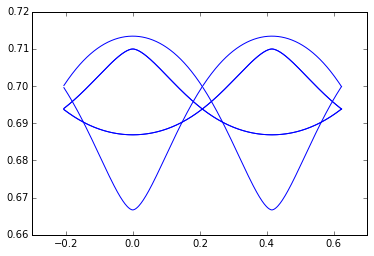

In [31]:
plt.plot(*chain.from_iterable((
            *zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))),
            'b-',
            *zip(*sorted(zip(k_grid[:, 0]+2*np.pi/8*bohr, omegas[:, i]))),
            'b-'
        ) for i in range(omegas.shape[1])))

In [32]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [33]:
cutoffs = [8., 12., 25., 50., 100., 200., 400., 800.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

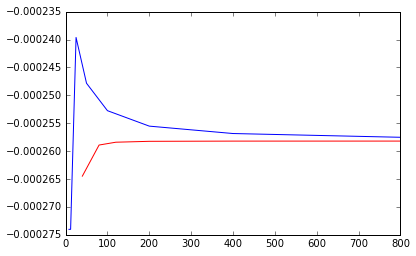

In [34]:
plt.plot(cutoffs, enes_supercell, 'b',
         10*np.array(ns_kpt), enes_periodic, 'r')

In [35]:
mbd.get_ts_energy('P', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)/2

-0.00012831280394436066

In [36]:
(enes_supercell[-1]/2, enes_periodic[-1]/2)

(-0.0001287618129337752, -0.0001291022956826926)

## Two parallel argon chains

In [37]:
mbd.param_dipole_matrix_accuracy = 1e-10

In [38]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (0., 0., 4.)]/bohr
uc = np.array([(4., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [41]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [42]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [43]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

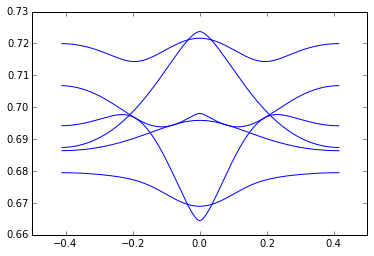

In [44]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [45]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [46]:
cutoffs = [8., 12., 25., 50., 100., 200., 400., 800.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

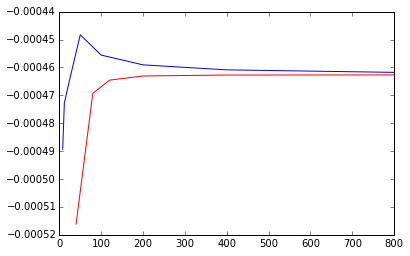

In [47]:
plt.plot(cutoffs, enes_supercell, 'b',
         [10*x for x in ns_kpt], enes_periodic, 'r')

In [48]:
mbd.get_ts_energy('P', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.0004638232296040013

In [49]:
(enes_supercell[-1], enes_periodic[-1])

(-0.0004617811554708101, -0.00046269334224474103)

## Argon crystal

In [50]:
species = ['Ar']
xyz = [(0., 0., 0.)]/bohr
uc = np.array([(4., 0., 0.), (0., 4., 0.), (0., 0., 4.)])/bohr
mbd.param_vacuum_axis = (False, False, False)

In [52]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [53]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(30, 1, 1), uc)

In [54]:
mbd.param_dipole_matrix_accuracy = 1e-7

In [55]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

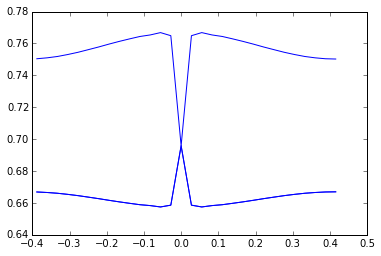

In [56]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [57]:
ns_kpt = [3, 4, 5]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, n_kpt, n_kpt), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [58]:
cutoffs = [8., 12.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

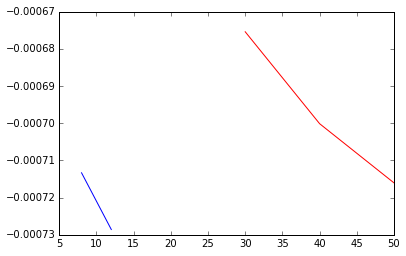

In [59]:
plt.plot(cutoffs, enes_supercell, 'b',
         [10*x for x in ns_kpt], enes_periodic, 'r')

In [60]:
mbd.get_ts_energy('P', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.0007571292345517154

## Graphene

In [61]:
mbd.param_dipole_matrix_accuracy = 1e-7

In [62]:
species = ['C', 'C']
xyz = [(0., 0., 0.), (2.46000413, 1.42034734, 0.)]/bohr
uc = np.array([
    (2.45999892, 0.00000000, 0.00000000),
    (1.22999946, 2.13042155, 0.00000000),
    (0.00000000, 0.00000000, 100.00000000)])/bohr
mbd.param_vacuum_axis = (False, False, True)

In [64]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [65]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(100, 1, 1), uc)

In [66]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

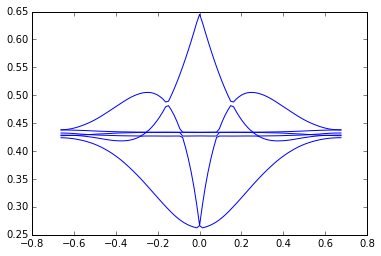

In [67]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [68]:
ns_kpt = [4, 6, 8, 10]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, n_kpt, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [69]:
cutoffs = [8., 12., 16.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

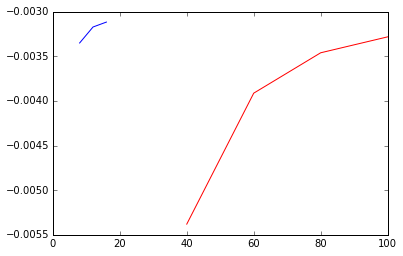

In [70]:
plt.plot(cutoffs, enes_supercell, 'b',
         [10*x for x in ns_kpt], enes_periodic, 'r')